In [1]:
import tensorflow as tf
import os
import PIL
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
import pathlib

REEMPLAZAR CON IMÁGENES (



In [2]:
dataUrl = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
dataDirectory = pathlib.Path(tf.keras.utils.get_file("flower_photos", origin=dataUrl, untar=True))

228827136/228813984 [==============================] - 3s 0us/step


In [3]:
print(dataDirectory)

/root/.keras/datasets/flower_photos


/root/.keras/datasets/flower_photos/daisy/3310644753_5607eb96a4_m.jpg


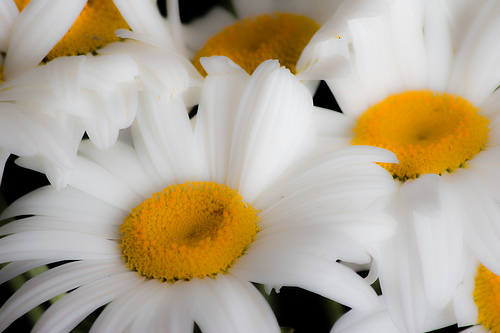

In [4]:
daisies = list(dataDirectory.glob("daisy/*"))
print(daisies[1])
PIL.Image.open(str(daisies[0]))

)

In [13]:
imgHeight, imgWidth = 100, 100
batchSize = 2
trainDataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataDirectory,
    validation_split=0.2,
    subset="training",
    seed=539,
    label_mode="categorical",
    image_size=(imgWidth, imgHeight),
    batch_size=batchSize
)
# CONSIDERAR [LABEL_MODE="BINARY"] EN PROYECTO FINAL

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [9]:
validationDataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataDirectory,
    validation_split=0.2,
    subset="validation",
    seed=539,
    label_mode="categorical",
    image_size=(imgWidth, imgHeight),
    batch_size=batchSize
)
# CONSIDERAR [LABEL_MODE="BINARY"] EN PROYECTO FINAL

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [10]:
classNames = trainDataset.class_names
print(classNames)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [16]:
Model = Sequential()

preTrainedModel = tf.keras.applications.ResNet50(
    pooling="avg",
    classes=5, 
    input_shape=(100, 100, 3),
    weights="imagenet",
    include_top=False
)

# CAMBIAR Nº DE CLASES EN PROYECTO FINAL ^^^^^

for layer in preTrainedModel.layers:
    layer.trainable=False


Model.add(preTrainedModel)
Model.add(Flatten())
Model.add(Dense(512, activation="relu"))
Model.add(Dense(5, activation="softmax"))

Model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_3 (ModuleWra  (None, 2048)             0         
 pper)                                                           
                                                                 
 module_wrapper_4 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_5 (ModuleWra  (None, 5)                2565      
 pper)                                                           
                                                                 
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
__________________________________

In [17]:
Model.compile(optimizer=Adam(learning_rate=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

In [18]:
hist = Model.fit(
    trainDataset,
    validation_data=validationDataset,
    epochs=10
)

Epoch 1/10
1468/1468 [==============================] - 214s 143ms/step - loss: 0.9083 - accuracy: 0.7047 - val_loss: 0.6966 - val_accuracy: 0.7534
Epoch 2/10
1468/1468 [==============================] - 202s 138ms/step - loss: 0.4835 - accuracy: 0.8236 - val_loss: 0.6470 - val_accuracy: 0.7820
Epoch 3/10
  85/1468 [>.............................] - ETA: 2:49 - loss: 0.3405 - accuracy: 0.8824

KeyboardInterrupt: ignored